In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
print(mnist)

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)                      
#graph structure
def train(learning_rate,beta1,beta2,index):
    sess = tf.InteractiveSession()
    x = tf.placeholder("float", [None, 784])
    y_ = tf.placeholder("float", [None, 10])

    weights_1 =  weight_variable([784,10])
    b1 = bias_variable([10])
    weights_2 =  weight_variable([10,10])
    b2 = bias_variable([10])

    x2 = tf.nn.relu(tf.matmul(x,weights_1)+b1)
    logits = tf.matmul(x2,weights_2)+b2
    y = tf.nn.softmax(logits)

    #loss function
    #cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))  
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=logits))
    #regularizaiton
    regularizer1 = (tf.nn.l2_loss(weights_1) + tf.nn.l2_loss(weights_2))/2
    regularizer2 = (tf.nn.l2_loss(b1)+tf.nn.l2_loss(b2))/2
    #total loss
    loss = tf.reduce_mean(cross_entropy+beta1*regularizer1+beta2*regularizer2)
    #optimizer
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)
   # with tf.Session() as sess:
        #Run Computation & Iterate
    sess.run(tf.initialize_all_variables())
        #print('Initialized')
    for i in range(0,1875):
        batch = mnist.train.next_batch(128)
        train_step.run(feed_dict={x: batch[0], y_: batch[1]})
        if (i+1)%10 == 0:
            correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            accu = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
                #print("%d lr:%f acc:%f"%(i+1,learning_rate,accu))
            result_data[index,int((i+1)/10)-1] = accu
        if (i+1)%300 == 0:
            print("%d lr:%f acc:%f"%(i+1,learning_rate,accu))
    sess.close()
    del sess

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001C6D64320F0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001C6E26E3908>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001C6E26E3CF8>)


In [2]:
result_data = np.zeros((30, 375))
rand_data = np.arange(np.log(0.001),np.log(1),(np.log(1)-np.log(0.001))/50)
x = [0.0001,0.00015,0.0002,0.00025,0.0003,0.0004,0.0005,0.0006,0.007,0.0008,0.0009,
     0.001, 0.002 ,0.003 ,0.004 ,0.005 ,0.006 ,0.007,0.008 ,0.009,
     0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07, 0.08,  0.09, 0.1]
for index in range(0, len(x)):
    lr = x[index]
    bet1 = 1/(784*10*10)
    bet2 = 1/(10+10)
    train(lr,bet1,bet2,index)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
300 lr:0.000100 acc:0.260500
600 lr:0.000100 acc:0.544700
900 lr:0.000100 acc:0.695700
1200 lr:0.000100 acc:0.758600
1500 lr:0.000100 acc:0.792000
1800 lr:0.000100 acc:0.811500
300 lr:0.000150 acc:0.447700
600 lr:0.000150 acc:0.617200
900 lr:0.000150 acc:0.742600
1200 lr:0.000150 acc:0.788400
1500 lr:0.000150 acc:0.820500
1800 lr:0.000150 acc:0.836000
300 lr:0.000200 acc:0.676100
600 lr:0.000200 acc:0.786100
900 lr:0.000200 acc:0.826000
1200 lr:0.000200 acc:0.851000
1500 lr:0.000200 acc:0.865500
1800 lr:0.000200 acc:0.876100
300 lr:0.000250 acc:0.641200
600 lr:0.000250 acc:0.810600
900 lr:0.000250 acc:0.846300
1200 lr:0.000250 acc:0.864000
1500 lr:0.000250 acc:0.876900
1800 lr:0.000250 acc:0.885500
300 lr:0.000300 acc:0.716000
600 lr:0.000300 acc:0.830200
900 lr:0.000300 acc:0.864500
1200 lr:0.000300 acc:0.885900
1500 lr:0.000300 acc:0.893500
1800 lr:0.000300 acc:0.900000
300 lr:0.000400 acc:0.765500
600 lr:0.000

## draw the plot

In [31]:
result1 = result_data
result = result_data[:,0:186]
result
result_data[28,:] = result_data[16,:]

In [32]:
import numpy as np
import matplotlib.pyplot as plt
Xmax = np.zeros(187)
Xmin = np.zeros(187)
X_lrmax = np.zeros(187)
X_lrmin = np.zeros(187)
X_lrmedian = np.zeros(187)
Sum  = np.zeros(30)
Xlr = x

for n in range(0,187):
    Xmax[n] = np.max(result_data[:,n])
    Xmin[n] = np.min(result_data[:,n])

for m in range(0,30):   
    Sum[m]  = np.sum(result_data[m,:])
    
lr_min_i = np.argwhere(Sum == np.min(Sum))
lr_max_i = np.argwhere(Sum == np.max(Sum))
#lr_median_i = np.argwhere(Sum == np.median(Sum))
lr_min = Xlr[lr_min_i[0,0]]
lr_max = Xlr[lr_max_i[0,0]]
#lr_median = Xlr[0,lr_median_i[0,0]]

for n in range(0,187):
    X_lrmin[n] = result_data[lr_min_i[0,0],n]
    X_lrmax[n] = result_data[lr_max_i[0,0],n]
 #   X_lrmedian[0,n] = result_data[lr_median_i[0,0],n]

x_in=np.arange(0,4,4.0/187)

In [33]:
lr_min_i
lr_max_i

array([[19]], dtype=int64)

In [28]:
Sum1=Sum
Sum1 = np.sort(Sum1)
Sum

array([ 111.41749988,  123.85909982,  143.63789959,  146.02440048,
        149.50760012,  152.69300012,  158.27720028,  161.66280001,
        170.82050025,  162.13779971,  161.54389971,  164.29879981,
        168.42949966,  168.10830009,  170.38319981,  170.98670027,
        171.18710005,  171.46880016,  171.56569982,  171.98159972,
        170.92350036,  171.92460001,  170.51420003,  165.68649977,
        164.07459992,  162.11000025,  160.73170006,  162.90399992,
         83.69400001,  144.90909994])

D:\anaconda\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


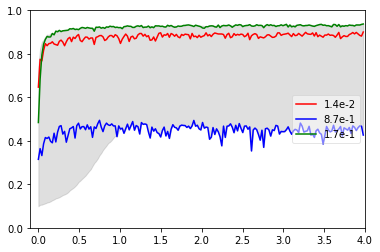

In [21]:
import matplotlib  
matplotlib.use('Agg')    
plt.axis([-0.1,4,0.0,1.0])
plt.plot(x_in,X_lrmedian,color = 'red',label='1.4e-2')
plt.plot(x_in,X_lrmin,color = 'blue',label='8.7e-1')
plt.plot(x_in,X_lrmax,color = 'green',label='1.7e-1')
plt.fill_between(x_in,Xmin,Xmax,color = 'grey',alpha = '0.25')
plt.legend(loc='center right',framealpha = 0.5)
plt.savefig("examples.png") 
plt.show()


D:\anaconda\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


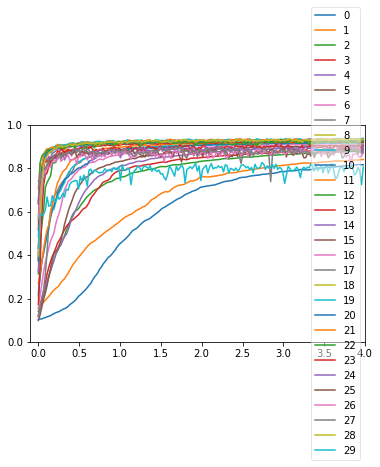

In [39]:
X1 = result_data[20,0:187]
X2 = result_data[29,0:187]
X3 = result_data[16,0:187]
import matplotlib  
matplotlib.use('Agg')    
plt.axis([-0.1,4,0.0,1.0])
for i in range(0,30):
    Y = result_data[i,0:187]
    Y_label = str(i) 
    plt.plot(x_in,Y,label = Y_label)
#plt.plot(x_in,X1,color = 'red',label='2e-2')
#plt.plot(x_in,X2,color = 'blue',label='9e-2')
#plt.plot(x_in,X3,color = 'green',label='6e-3')
#plt.fill_between(x_in,Xmin,Xmax,color = 'grey',alpha = '0.25')
plt.legend(loc='center right',framealpha = 0.5)
plt.savefig("adam2.png") 
plt.show()

In [36]:
import pandas as pd
import numpy as np

adagrad_result_csv = pd.DataFrame(np.zeros((30,375)))
adagrad_result_csv.iloc[:,:] = result_data
adagrad_result_csv.to_csv('adam',index=False)
training_csv = pd.read_csv('adam',index_col=0)
training_csv

np.save('adam-np.npy',result_data)